In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
lpn_df = pd.read_csv("eval_data\LPN_eval.csv")
base_line_df = pd.read_csv("eval_data\pretrain_eval.csv", skiprows=[0,2], header = None).T
maml_df = pd.read_csv("eval_data\maml_eval.csv", skiprows=[0,2], header = None).T
base_line_df.columns = ["mu", "ci"]
maml_df.columns = ["mu", "ci"]
base_line_df

,mu,ci
0,3.068855,0.245560
1,2.811536,0.224970
2,2.691486,0.215364
3,2.594211,0.207580
4,2.513640,0.201133
5,2.446209,0.195737
6,2.388349,0.191108
7,2.338682,0.187134
8,2.295478,0.183676
9,2.257835,0.180664


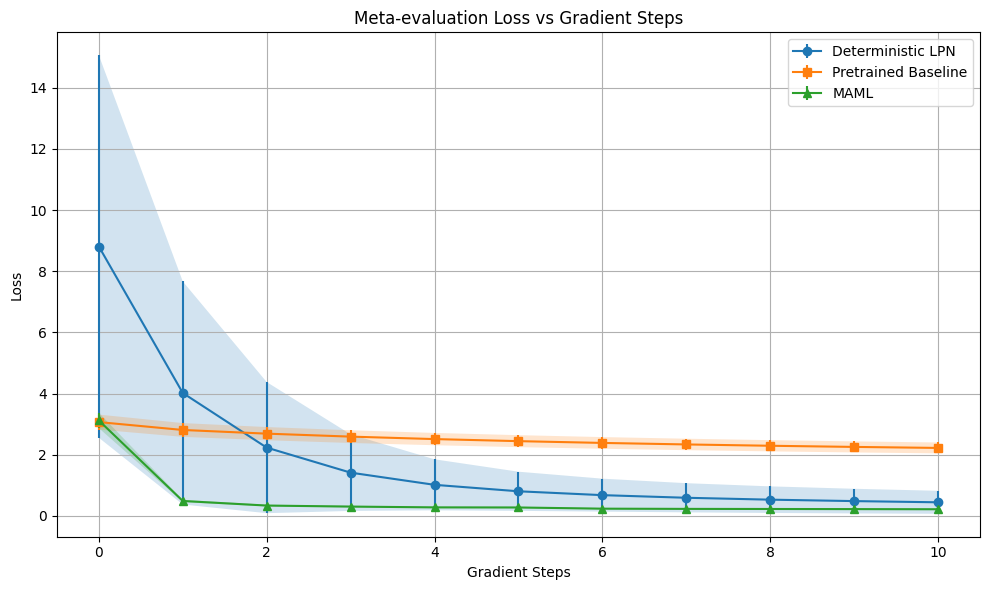

In [49]:
# Helper function to extract plot components
def extract_plot_data(df):
    mu = df["mu"].values
    ci = df["ci"].values
    lower_err = np.minimum(ci, mu)  # ensures lower bound ≥ 0
    upper_err = ci
    yerr = np.vstack([lower_err, upper_err])
    lower_bound = np.maximum(0, mu - ci)
    upper_bound = mu + ci
    return mu, yerr, lower_bound, upper_bound

# X-axis
test_numstep = len(lpn_df) - 1
x = np.arange(test_numstep + 1)

# Create the plot
plt.figure(figsize=(10, 6))

# LPN
mu_lpn, yerr_lpn, lb_lpn, ub_lpn = extract_plot_data(lpn_df)
plt.errorbar(x, mu_lpn, yerr=yerr_lpn, fmt='-o', label="Deterministic LPN")
plt.fill_between(x, lb_lpn, ub_lpn, alpha=0.2)

# Baseline
mu_base, yerr_base, lb_base, ub_base = extract_plot_data(base_line_df)
plt.errorbar(x, mu_base, yerr=yerr_base, fmt='-s', label="Pretrained Baseline")
plt.fill_between(x, lb_base, ub_base, alpha=0.2)

# MAML
mu_maml, yerr_maml, lb_maml, ub_maml = extract_plot_data(maml_df)
plt.errorbar(x, mu_maml, yerr=yerr_maml, fmt='-^', label="MAML")
plt.fill_between(x, lb_maml, ub_maml, alpha=0.2)

# Labels and legend
plt.xlabel('Gradient Steps')
plt.ylabel('Loss')
plt.title('Meta-evaluation Loss vs Gradient Steps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
    

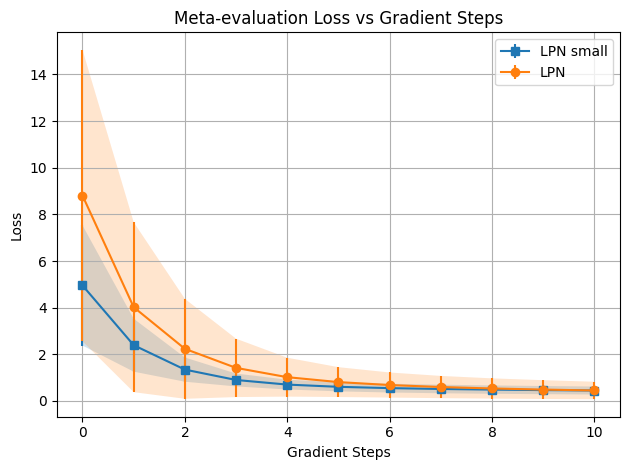

In [50]:
# lpn big model
lpn_big_df = pd.read_csv("eval_data\LPN_eval_small.csv")
mu_lpn_big, yerr_big, lb_lpn_big, ub_lpn_big = extract_plot_data(lpn_big_df)
plt.errorbar(x, mu_lpn_big, yerr=yerr_big, fmt='-s', label="LPN small")
plt.fill_between(x, lb_lpn_big, ub_lpn_big, alpha=0.2)

# LPN
mu_lpn, yerr_lpn, lb_lpn, ub_lpn = extract_plot_data(lpn_df)
plt.errorbar(x, mu_lpn, yerr=yerr_lpn, fmt='-o', label="LPN")
plt.fill_between(x, lb_lpn, ub_lpn, alpha=0.2)


# Labels and legend
plt.xlabel('Gradient Steps')
plt.ylabel('Loss')
plt.title('Meta-evaluation Loss vs Gradient Steps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
    